In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
rating_df = pd.read_csv('/content/drive/MyDrive/수업자료/00_dataset/movielens/ml-100k/u.data', 
                        sep='\t', 
                        header=None, 
                        names = ['userID', 'movieID', 'rating', 'timestamp'])
rating_df

,userID,movieID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [33]:
pv_df=pd.pivot_table(data=rating_df,values='rating',index='movieID',columns='userID')
pv_df

userID,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
movie_info_df = pd.read_csv('/content/drive/MyDrive/수업자료/00_dataset/movielens/ml-100k/u.item', sep='|', encoding='latin')
movie_info_df.columns = ['movieID' , 'movie_title' , 'release_date' , 'video_release_date' ,
              'IMDb_URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']
movie_info_df

,movieID,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- sparse matrix 만들기
- sklearn KNN에 학습
- 최근접 이웃을 직접 추출해서 추천을 할 것

matrix로 만들기 위해 빈공간을 제거하고 index를 새로 부여

In [35]:
# data, 좌표(row, col), shape

In [36]:
user_ids = rating_df['userID'].unique().tolist()
user_ids[:10]

[196, 186, 22, 244, 166, 298, 115, 253, 305, 6]

In [37]:
user2idx_dict = {x: i for i, x in enumerate(user_ids)}
idx2user_dict = {i: x for i, x in enumerate(user_ids)} # 다시 역방향으로 진행

# dict 형태로 만든 이유 --> map 함수에 바로 사용하기 위해서

In [38]:
movie_ids = rating_df["movieID"].unique().tolist()
movie2idx_dict = {x: i for i, x in enumerate(movie_ids)}
idx2movie_dict = {i: x for i, x in enumerate(movie_ids)}

In [39]:
rating_df["user_idx"] = rating_df["userID"].map(user2idx_dict)
rating_df["movie_idx"] = rating_df["movieID"].map(movie2idx_dict)

In [40]:
rating_df.head()

,userID,movieID,rating,timestamp,user_idx,movie_idx
0,196,242,3,881250949,0,0
1,186,302,3,891717742,1,1
2,22,377,1,878887116,2,2
3,244,51,2,880606923,3,3
4,166,346,1,886397596,4,4


In [41]:
# 중복되지 않는 user, movie가 몇 개인지
num_users = rating_df["userID"].nunique()
num_movies = rating_df["movieID"].nunique()
print(num_users, num_movies)

943 1682


In [43]:
rating_df = rating_df.sort_values(['user_idx', 'movie_idx'])
rating_df = rating_df.reset_index(drop=True)
rating_df

,userID,movieID,rating,timestamp,user_idx,movie_idx
0,196,242,3,881250949,0,0
1,196,257,2,881251577,0,10
2,196,111,4,881251793,0,83
3,196,25,4,881251955,0,86
4,196,382,4,881251843,0,92
...,...,...,...,...,...,...
99995,941,300,4,875048495,942,652
99996,941,1007,4,875049077,942,672
99997,941,124,5,875048996,942,873
99998,941,993,4,875048996,942,935


데이터 분포 조사

In [44]:
movies_count_df = pd.DataFrame(rating_df.groupby('movieID').size(), columns=['count'])
movies_count_df.head()

,count
movieID,
1,452
2,131
3,90
4,209
5,86


Text(0, 0.5, 'number of ratings')

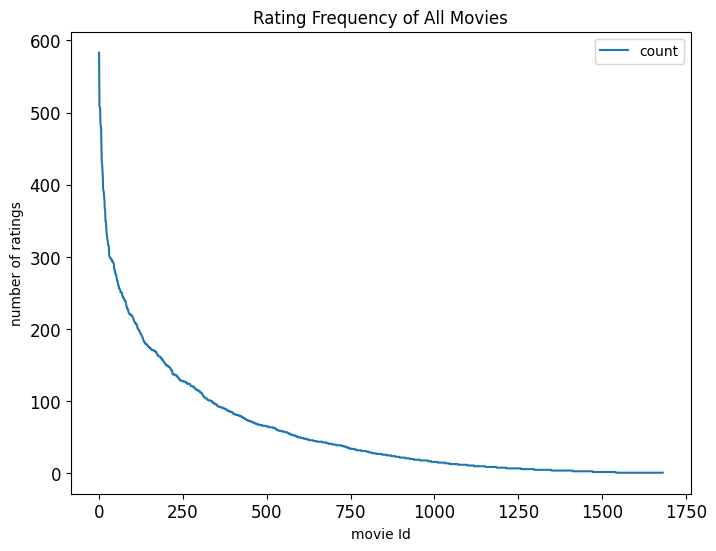

In [46]:
ax = movies_count_df.sort_values('count', ascending=False).reset_index(drop=True).plot( 
                                                                                        figsize=(8, 6),
                                                                                        title='Rating Frequency of All Movies',
                                                                                        fontsize=12
                                                                                    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

sparse data matrix 생성

In [48]:
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix
num_users = rating_df['user_idx'].nunique()
num_movies = rating_df['movie_idx'].nunique()
print(num_users, num_movies)

rating_sparse_arr = coo_matrix((rating_df['rating'].to_list(), # data
                              (rating_df['user_idx'].to_list(), # rows
                              rating_df['movie_idx'].to_list())), # columns
                             shape=(num_users, num_movies)) # shape
rating_sparse_arr
# 주의 !
# data와 row, col의 길이는 동일해야함
# num_users, num_movies는 row, col보다 커야함

943 1682


<943x1682 sparse matrix of type '<class 'numpy.int64'>'
	with 100000 stored elements in COOrdinate format>

model 정의 및 학습

In [49]:
knn_model = NearestNeighbors(n_neighbors = 40, metric='cosine', algorithm='brute')
knn_model.fit(rating_sparse_arr)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=40)

최근접 이웃 추론

In [50]:
target_user_id = 30
# 30번 유저에 대해서 영화 추천

In [64]:
target_user_df = rating_df[rating_df['userID']==target_user_id]
target_user_sprs = coo_matrix((target_user_df['rating'].to_list(), ([0] * len(target_user_df), target_user_df['movie_idx'].to_list())), shape = (1, num_movies))
target_user_sprs

<1x1682 sparse matrix of type '<class 'numpy.int64'>'
	with 43 stored elements in COOrdinate format>

In [71]:
distances, indices = knn_model.kneighbors(target_user_sprs, n_neighbors=40)
# distance는 거리 / indice는 누구인지
# print(distances, indices)
for d, i in zip(distances[0], indices[0]):
    print(f'{i} -  {d:.2f}')

# arr = knn_model.kneighbors_graph(get_single_user)
# for a in arr:
#     print(a)
    

286 -  0.00
459 -  0.66
818 -  0.67
403 -  0.68
931 -  0.68
670 -  0.68
189 -  0.69
592 -  0.69
450 -  0.69
552 -  0.69
480 -  0.69
177 -  0.70
230 -  0.70
656 -  0.70
410 -  0.70
763 -  0.70
244 -  0.70
713 -  0.71
557 -  0.71
67 -  0.71
176 -  0.71
740 -  0.72
589 -  0.72
298 -  0.72
399 -  0.72
541 -  0.73
477 -  0.73
762 -  0.73
320 -  0.73
738 -  0.73
457 -  0.74
728 -  0.74
98 -  0.74
757 -  0.74
662 -  0.74
275 -  0.74
868 -  0.74
529 -  0.74
902 -  0.74
936 -  0.74


빈도 기반 영화 추천

In [75]:
# 위에서 최근접 이웃을 추론한 사람들 중에,,,
freq_score_df = rating_df[rating_df['user_idx'].isin(indices[0])].groupby('movieID').agg('count').sort_values('rating', ascending = False)['rating']
freq_score_df

movieID
258     37
286     33
313     30
294     29
300     27
        ..
547      1
530      1
528      1
521      1
1654     1
Name: rating, Length: 690, dtype: int64

In [67]:
freq_result_df = pd.merge(freq_score_df, movie_info_df[['movieID', 'movie_title']], on = 'movieID', how='inner')
freq_result_df

,movieID,rating,movie_title
0,258,37,Contact (1997)
1,286,33,"English Patient, The (1996)"
2,313,30,Titanic (1997)
3,294,29,Liar Liar (1997)
4,300,27,Air Force One (1997)
...,...,...,...
684,547,1,"Young Poisoner's Handbook, The (1995)"
685,530,1,"Man Who Would Be King, The (1975)"
686,528,1,"Killing Fields, The (1984)"
687,521,1,"Deer Hunter, The (1978)"


평점 예측

In [69]:
rating_score_df = rating_df[rating_df['user_idx'].isin(indices[0])].groupby('movieID').agg('mean').sort_values('rating', ascending = False)['rating']
rating_score_df

movieID
480     5.0
1065    5.0
648     5.0
889     5.0
484     5.0
       ... 
577     1.0
559     1.0
1234    1.0
1258    1.0
1654    1.0
Name: rating, Length: 690, dtype: float64

In [ ]:
rating_result_df = pd.merge(rating_score_df, movie_info_df[['movieID', 'movie_title']], on = 'movieID', how='inner')
rating_result_df

,movieID,rating,movie_title
0,912,5.00,U.S. Marshalls (1998)
1,1293,5.00,Star Kid (1997)
2,454,5.00,Bastard Out of Carolina (1996)
3,1178,5.00,Major Payne (1994)
4,1449,5.00,Pather Panchali (1955)
...,...,...,...
233,5,1.25,Copycat (1995)
234,355,1.00,Sphere (1998)
235,786,1.00,"Perez Family, The (1995)"
236,468,1.00,Rudy (1993)


In [ ]:
# 가중 평균 : surprise에서는 친구와의 유사도 * 평점

[Ex] (내 친구들이)가장 많이 본 영화 중 4점 이상인 영화만 추첨

In [92]:
freq_score_df = rating_df[rating_df['user_idx'].isin(indices[0])].groupby('movieID').agg({'userID':'count', 'rating':'mean'}).sort_values('userID', ascending = False).reset_index()
freq_score4_df = freq_score_df[freq_score_df['rating']>=4]

freq_score4_df

,movieID,userID,rating
2,313,30,4.400000
5,50,23,4.521739
10,181,21,4.190476
14,172,18,4.500000
15,302,17,4.058824
...,...,...,...
678,576,1,4.000000
679,570,1,4.000000
682,560,1,4.000000
687,528,1,4.000000


In [98]:
score4_result_df = pd.merge(freq_score4_df, movie_info_df[['movieID', 'movie_title']], on = 'movieID', how='inner')
score4_result_df.sort_values(by = ['userID', 'rating'], ascending = [False, False])

,movieID,userID,rating,movie_title
0,313,30,4.400000,Titanic (1997)
1,50,23,4.521739,Star Wars (1977)
2,181,21,4.190476,Return of the Jedi (1983)
3,172,18,4.500000,"Empire Strikes Back, The (1980)"
4,302,17,4.058824,L.A. Confidential (1997)
...,...,...,...,...
212,576,1,4.000000,Cliffhanger (1993)
213,570,1,4.000000,Wyatt Earp (1994)
214,560,1,4.000000,"Kid in King Arthur's Court, A (1995)"
215,528,1,4.000000,"Killing Fields, The (1984)"


[EX] 10M 또는 25M 데이터로 해보기

In [106]:
rating_df = pd.read_csv('/content/drive/MyDrive/수업자료/00_dataset/movielens/ml-10M/ratings.dat', 
                        sep='::', 
                        header=None, 
                        names = ['userID', 'movieID', 'rating', 'timestamp'])
rating_df

<ipython-input-106-3ee88bf27123>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating_df = pd.read_csv('/content/drive/MyDrive/수업자료/00_dataset/movielens/ml-10M/ratings.dat',


,userID,movieID,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392
...,...,...,...,...
10000049,71567,2107,1.0,912580553
10000050,71567,2126,2.0,912649143
10000051,71567,2294,5.0,912577968
10000052,71567,2338,2.0,912578016


In [113]:
movie_info_df = pd.read_csv('/content/drive/MyDrive/수업자료/00_dataset/movielens/ml-1m/movies.dat', sep='::',header=None, encoding='latin',error_bad_lines=False)
movie_info_df.columns = ['movieID' , 'movie_title' , 'genre']
movie_info_df

<ipython-input-113-c8d256718f30>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie_info_df = pd.read_csv('/content/drive/MyDrive/수업자료/00_dataset/movielens/ml-1m/movies.dat', sep='::',header=None, encoding='latin',error_bad_lines=False)
<ipython-input-113-c8d256718f30>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  movie_info_df = pd.read_csv('/content/drive/MyDrive/수업자료/00_dataset/movielens/ml-1m/movies.dat', sep='::',header=None, encoding='latin',error_bad_lines=False)


,movieID,movie_title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
